In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("IMDB-Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[df["review"].isna()]

,review,sentiment


In [5]:
df["sentiment"]

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [6]:
df.sentiment = pd.Categorical(df.sentiment)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df["sentiment_num"] = df.sentiment.cat.codes

In [9]:
df.head()

,review,sentiment,sentiment_num
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [10]:
# df_train.dropna(inplace=True)
# df_test.dropna(inplace=True)

In [11]:
X = df["review"]
y = df["sentiment_num"]

In [12]:
print(len(X), len(y))

50000 50000


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

In [14]:
X_vect = vectorizer.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=.25, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)

(37500, 101583)
(12500, 101583)


In [17]:
from sklearn.svm import SVC

In [18]:
# Initialize and train the classifier
# clf = SVC(kernel='linear', verbose=True)
# clf.fit(X_train, y_train)

In [20]:
# Initialize and train the classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [22]:
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int8)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 89.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.89      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



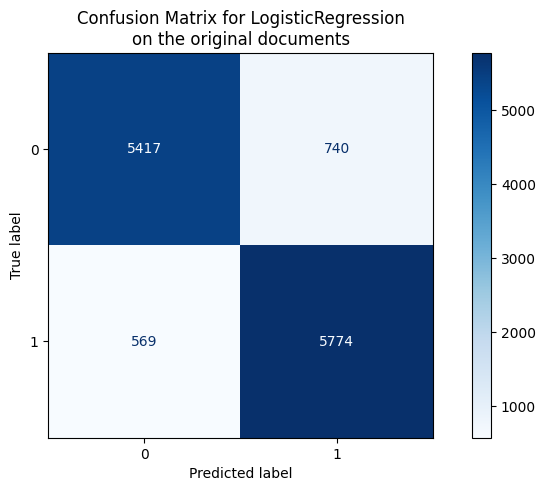

In [25]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay # C.M.

# target_names = newsgroups.target_names

fig, ax = plt.subplots(figsize=(10, 5))
# Se cambió el cmap de viridis a Blues. Este cmap es el más común en C.M.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
# ax.xaxis.set_ticklabels(target_names)
# ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)
plt.show()

---
Árboles de decisión

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
arbol_pred = arbol.predict(X_test)

In [29]:
# Evaluate the performance
accuracy = accuracy_score(y_test, arbol_pred)
report = classification_report(y_test, arbol_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 72.46%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      6157
           1       0.73      0.72      0.73      6343

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500



In [30]:
# kNN k-Nearest-Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
knn_pred = knn_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 77.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6157
           1       0.76      0.80      0.78      6343

    accuracy                           0.77     12500
   macro avg       0.77      0.77      0.77     12500
weighted avg       0.77      0.77      0.77     12500

